Synthesize a discrete-time signal by using the IDFT in matrix notation for different values of N. Show the matrices W and K. Plot the signal synthesized.
Variant 13


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
from numpy.fft import fft, ifft
#from scipy.fft import fft, ifft
N = 10 #number of samples/signal block lenght
k = np.arange(N)  # all required sample/time indices, already defined above
# all required DFT frequency indices, actually same entries like in k
mu = np.arange(N)

# set up matrices
K = np.outer(k, mu)  # get all possible entries k*mu in meaningful arrangement
W = np.exp(+1j * 2*np.pi/N * K)  # analysis matrix for DFT

Data in K and W matrix for N=10

In [12]:
print ('K matrix')
print (K)
print ('W matrix with real and imag')
for tmp1 in range(N):
    print (W[:, tmp1].real,)
    print (W[:, tmp1].imag,)

K matrix
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]
W matrix with real and imag
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.          0.80901699  0.30901699 -0.30901699 -0.80901699 -1.
 -0.80901699 -0.30901699  0.30901699  0.80901699]
[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01]
[ 1.          0.30901699 -0.80901699 -0.80901699  0.30901699  1.
  0.30901699 -0.80901699 -0.80901699  0.30901699]
[ 0.00000000e+00  9.51056516e-01  5.87785252e-01 -5.87785252e-01
 -9.51056516e-01 -2.44929360e-16  9.51056516e-01  5.87785252e-01
 -5.87785252e-01 -9.51056516e-01]
[ 1.      

Visualization W matrices

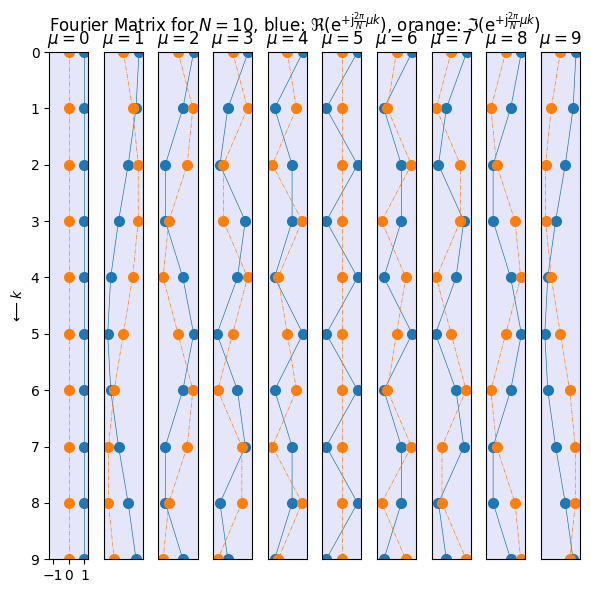

In [13]:

fig, ax = plt.subplots(1, N)
fig.set_size_inches(6, 6)
fig.suptitle(
    r'Fourier Matrix for $N=$%d, blue: $\Re(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$, orange: $\Im(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$' % N)

for tmp in range(N):
    ax[tmp].set_facecolor('lavender')
    ax[tmp].plot(W[:, tmp].real, k, 'C0o-', ms=7, lw=0.5)
    ax[tmp].plot(W[:, tmp].imag, k, 'C1o-.', ms=7, lw=0.5)
    ax[tmp].set_ylim(N-1, 0)
    ax[tmp].set_xlim(-5/4, +5/4)
    if tmp == 0:
        ax[tmp].set_yticks(np.arange(0, N))
        ax[tmp].set_xticks(np.arange(-1, 1+1, 1))
        ax[tmp].set_ylabel(r'$\longleftarrow k$')
    else:
        ax[tmp].set_yticks([], minor=False)
        ax[tmp].set_xticks([], minor=False)
    ax[tmp].set_title(r'$\mu=$%d' % tmp)
fig.tight_layout()
fig.subplots_adjust(top=0.91)

fig.savefig('fourier_matrix.png', dpi=300)

Visualization K matrices

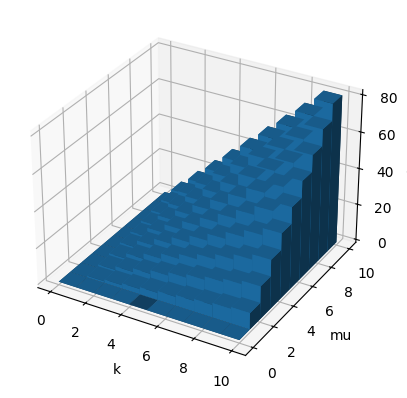

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# creating  X, Y Z grid
X, Y = np.meshgrid(k, mu)
Z = K

# array in 3d with values visulation
ax.bar3d(X.flatten(), Y.flatten(), np.zeros(N**2), 1, 1, Z.flatten(), shade=True)


# labels name
ax.set_xlabel('k')
ax.set_ylabel('mu')
ax.set_zlabel('values K')

# Wyświetlenie wykresu
plt.show()


Discrete-time signal by using the IDFT in matrix notation with synthesized signal plot

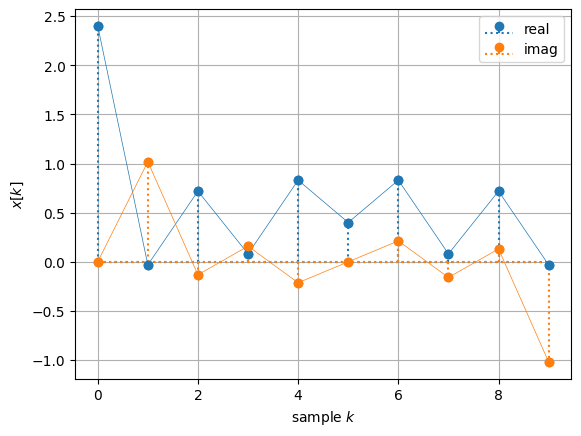

In [15]:
#variant 13 
if N == 10:
    X_test = np.array([6,2,4,3,4,5,0,0,0,0])
    x_test = 1/N * np.matmul(W, X_test) #matrix multiplication

    plt.stem(k, np.real(x_test), label='real',
             markerfmt='C0o', basefmt='C0:', linefmt='C0:')
    plt.stem(k, np.imag(x_test), label='imag',
             markerfmt='C1o', basefmt='C1:', linefmt='C1:')    
    # note that connecting the samples by lines is actually wrong, we
    # use it anyway for more visual convenience
    plt.plot(k, np.real(x_test), 'C0o-', lw=0.5)
    plt.plot(k, np.imag(x_test), 'C1o-', lw=0.5)
    plt.xlabel(r'sample $k$')
    plt.ylabel(r'$x[k]$')
    plt.legend()
    plt.grid(True)
    plt.show()
 

 check if results are identical with numpy ifft package

In [16]:
print(np.allclose(ifft(X_test), x_test))


True
